## DFO Nutrient Comparison

In [1]:
import sqlalchemy
from sqlalchemy import (create_engine, Column, String, Integer, Float, MetaData, 
                        Table, type_coerce, ForeignKey, case)
from sqlalchemy.orm import mapper, create_session, relationship, aliased, Session
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import case
import numpy as np
from sqlalchemy.ext.automap import automap_base
import matplotlib.pyplot as plt
import sqlalchemy.types as types
from sqlalchemy.sql import and_, or_, not_, func
from sqlalchemy.sql import select
import os
from os.path import isfile
import pandas as pd
import netCDF4 as nc
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools
import datetime as dt
import glob
import gsw

%matplotlib inline

In [2]:
PATH= '/results/SalishSea/hindcast.201905/'
start_date = dt.datetime(2016,1,1)
end_date = dt.datetime(2016,12,31)
flen=1
namfmt='nowcast'
filemap={'nitrate':'ptrc_T','silicon':'ptrc_T','ammonium':'ptrc_T','diatoms':'ptrc_T','ciliates':'ptrc_T','flagellates':'ptrc_T','vosaline':'grid_T','votemper':'grid_T'}
fdict={'ptrc_T':1,'grid_T':1}

df1=et.loadDFO(datelims=(start_date,end_date))#,excludeSaanich=False)
df1.head()

,Year,Month,Day,Hour,Lat,Lon,Pressure,Depth,Ammonium,Ammonium_units,Chlorophyll_Extracted,Chlorophyll_Extracted_units,N,Si,Silicate_units,AbsSal,ConsT,Z,dtUTC
0,2016.0,3.0,15.0,2.717778,49.250500,-123.749000,1.2,None,None,None,2.44,mg/m^3,24.36,52.48,umol/L,26.785671,8.486913,1.18979,2016-03-15 02:43:04
1,2016.0,3.0,15.0,2.717778,49.250500,-123.749000,10.3,None,None,None,1.83,mg/m^3,26.89,54.60,umol/L,28.123865,8.624301,10.2122,2016-03-15 02:43:04
2,2016.0,3.0,15.0,2.717778,49.250500,-123.749000,19.8,None,None,None,1.62,mg/m^3,27.16,54.97,umol/L,28.355749,8.672286,19.6307,2016-03-15 02:43:04
3,2016.0,3.0,15.0,2.717778,49.250500,-123.749000,388.9,None,None,None,NaN,mg/m^3,29.11,71.41,umol/L,31.302066,9.884660,385.23,2016-03-15 02:43:04
4,2016.0,3.0,15.0,6.297222,49.162333,-123.549833,1.0,None,None,None,2.22,mg/m^3,22.74,60.51,umol/L,24.062870,8.149664,0.991502,2016-03-15 06:17:50


(array([ 37., 398.,  75., 597.,   0.,  52.,  36., 378.,  58., 230.]),
 array([ 3. ,  3.8,  4.6,  5.4,  6.2,  7. ,  7.8,  8.6,  9.4, 10.2, 11. ]),
 <a list of 10 Patch objects>)

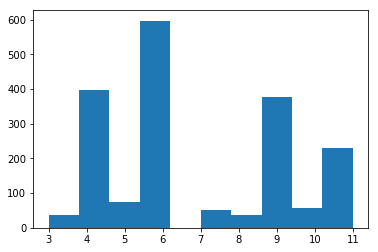

In [3]:
plt.hist(df1.Month)

In [4]:
data=et.matchData(df1,filemap, fdict, start_date, end_date, namfmt, PATH, flen)

In [5]:
data.head()

,Year,Month,Day,Hour,Lat,Lon,Pressure,Depth,Ammonium,Ammonium_units,...,i,mod_nitrate,mod_silicon,mod_ammonium,mod_diatoms,mod_ciliates,mod_flagellates,mod_vosaline,mod_votemper,k
0,2016.0,3.0,15.0,2.717778,49.250500,-123.749000,1.2,None,None,None,...,245,21.740608,45.442696,0.928356,0.102041,0.160535,0.327027,26.752441,8.210251,1
1,2016.0,3.0,15.0,2.717778,49.250500,-123.749000,10.3,None,None,None,...,245,22.934999,45.541023,0.859966,0.056668,0.128127,0.252875,27.784819,8.297086,10
2,2016.0,3.0,15.0,2.717778,49.250500,-123.749000,19.8,None,None,None,...,245,23.423210,45.580963,0.822165,0.037799,0.113060,0.206928,28.192755,8.375991,18
3,2016.0,3.0,15.0,2.717778,49.250500,-123.749000,388.9,None,None,None,...,245,27.069996,56.615070,0.296325,0.000038,0.000087,0.000449,31.434589,9.819111,37
4,2016.0,3.0,15.0,6.297222,49.162333,-123.549833,1.0,None,None,None,...,263,22.874743,45.264481,0.842252,0.078034,0.150518,0.285265,27.977825,8.235652,0


In [6]:
data.loc[data.Chlorophyll_Extracted>10]

,Year,Month,Day,Hour,Lat,Lon,Pressure,Depth,Ammonium,Ammonium_units,...,i,mod_nitrate,mod_silicon,mod_ammonium,mod_diatoms,mod_ciliates,mod_flagellates,mod_vosaline,mod_votemper,k
32,2016.0,3.0,19.0,10.739722,49.655500,-124.549833,1.3,None,None,None,...,178,21.786545,45.753349,0.978728,0.248859,0.211336,0.263769,27.289841,8.420959,1
65,2016.0,4.0,22.0,17.342778,48.471667,-124.548833,2.1,None,None,None,...,31,6.918216,8.390772,1.074120,4.239407,0.231090,0.120559,30.649931,11.756658,2
165,2016.0,4.0,23.0,22.593611,49.030667,-123.436833,1.9,None,None,None,...,264,1.521024,4.029783,1.171191,1.442346,0.260924,0.071467,23.159088,13.961158,1
558,2016.0,6.0,4.0,19.499444,49.198500,-123.440333,2.2,None,None,None,...,284,1.678008,15.182125,0.641599,1.533924,0.366918,1.077208,17.818390,15.744799,2
760,2016.0,6.0,18.0,8.671111,49.163167,-123.549667,10.9,None,None,None,...,264,2.320865,6.264206,0.457518,0.282355,0.161408,2.978758,27.962181,12.640623,10
1108,2016.0,7.0,5.0,16.954444,49.834333,-124.862667,2.1,None,None,None,...,155,0.263771,21.358673,0.154681,0.037735,0.124515,2.919451,25.467480,17.328949,2
1180,2016.0,8.0,18.0,4.569167,48.299833,-123.998833,5.0,None,None,None,...,91,13.758503,35.188744,1.554467,0.614279,0.230177,1.506597,29.676439,13.312789,4


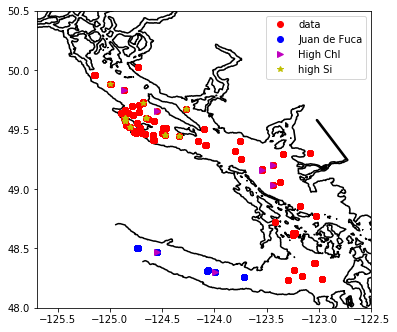

In [7]:
fig, ax = plt.subplots(figsize = (6,6))
viz_tools.set_aspect(ax, coords = 'map')
ax.plot(data['Lon'], data['Lat'], 'ro',label='data')
ax.plot(data.loc[(data.Lon < -123.5) & (data.Lat < 48.6),['Lon']], 
        data.loc[(data.Lon < -123.5) & (data.Lat < 48.6),['Lat']], 
        'bo', label = 'Juan de Fuca')
ax.plot(data.loc[data.Chlorophyll_Extracted>10,['Lon']],data.loc[data.Chlorophyll_Extracted>10,['Lat']],'m>',label='High Chl')

ax.plot(data.loc[data.Si>75,['Lon']],data.loc[data.Si>75,['Lat']],'*',color='y',label='high Si')
grid = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
viz_tools.plot_coastline(ax, grid, coords = 'map')
ax.set_ylim(48, 50.5)
ax.legend()
ax.set_xlim(-125.7, -122.5);

# Nitrate

In [8]:
N_s, modmean_s, obsmean_s, bias_s, RMSE_s, WSS_s = et.stats(data.loc[data.Z<15,['N']],data.loc[data.Z<15,['mod_nitrate']])
N_i, modmean_i, obsmean_i, bias_i, RMSE_i, WSS_i = et.stats(data.loc[(data.Z>=15)&(data.Z<22),['N']],data.loc[(data.Z>=15)&(data.Z<22),['mod_nitrate']])
N_d, modmean_d, obsmean_d, bias_d, RMSE_d, WSS_d = et.stats(data.loc[data.Z>=22,['N']],data.loc[data.Z>=22,['mod_nitrate']])
N, modmean, obsmean, bias, RMSE, WSS = et.stats(data.loc[:,['N']],data.loc[:,['mod_nitrate']])
print('Nitrate')
print('z<15 m:')
print('  N: {}\n  bias: {}\n  RMSE: {}\n  WSS: {}'.format(N_s,bias_s,RMSE_s,WSS_s))
print('15 m<=z<22 m:')
print('  N: {}\n  bias: {}\n  RMSE: {}\n  WSS: {}'.format(N_i,bias_i,RMSE_i,WSS_i))
print('z>=22 m:')
print('  N: {}\n  bias: {}\n  RMSE: {}\n  WSS: {}'.format(N_d,bias_d,RMSE_d,WSS_d))
print('all:')
print('  N: {}\n  bias: {}\n  RMSE: {}\n  WSS: {}'.format(N,bias,RMSE,WSS))


Nitrate
z<15 m:
  N: 495
  bias: -0.4308796475984611
  RMSE: 4.670217246203306
  WSS: 0.9183277409846412
15 m<=z<22 m:
  N: 129
  bias: -1.3962073082147626
  RMSE: 3.3866393379499575
  WSS: 0.8259799116061303
z>=22 m:
  N: 1057
  bias: -1.5379880680672464
  RMSE: 2.458784836968955
  WSS: 0.9041391945806381
all:
  N: 1681
  bias: -1.2011002714265508
  RMSE: 3.3322979470389744
  WSS: 0.9618466091366666


(0, 40)

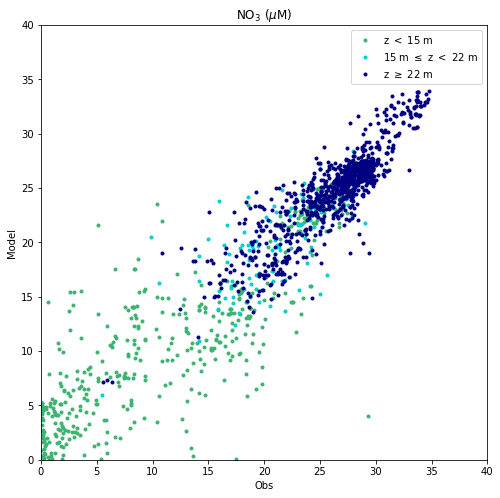

In [9]:
fig, ax = plt.subplots(figsize = (8,8))
ps=et.varvarPlot(ax,data,'N','mod_nitrate','Z',(15,22),'z','m',('mediumseagreen','darkturquoise','navy'))
ax.legend(handles=ps)
ax.set_xlabel('Obs')
ax.set_ylabel('Model')
ax.set_title('NO$_3$ ($\mu$M)')
ax.set_xlim(0,40)
ax.set_ylim(0,40)

Nitrate, z<15
Feb-Mar:
  N: 21
  bias: -2.6588944280715197
  RMSE: 3.2284242725974885
  WSS: 0.5173964929297379
April:
  N: 115
  bias: 0.6400614163357297
  RMSE: 4.340030218217069
  WSS: 0.8453155879571868
May-Jun:
  N: 206
  bias: -1.4102711572961937
  RMSE: 5.195953812747673
  WSS: 0.8118643903606619
Sep-Oct:
  N: 153
  bias: 0.3886284506710531
  RMSE: 4.315827190577459
  WSS: 0.9245406879178342


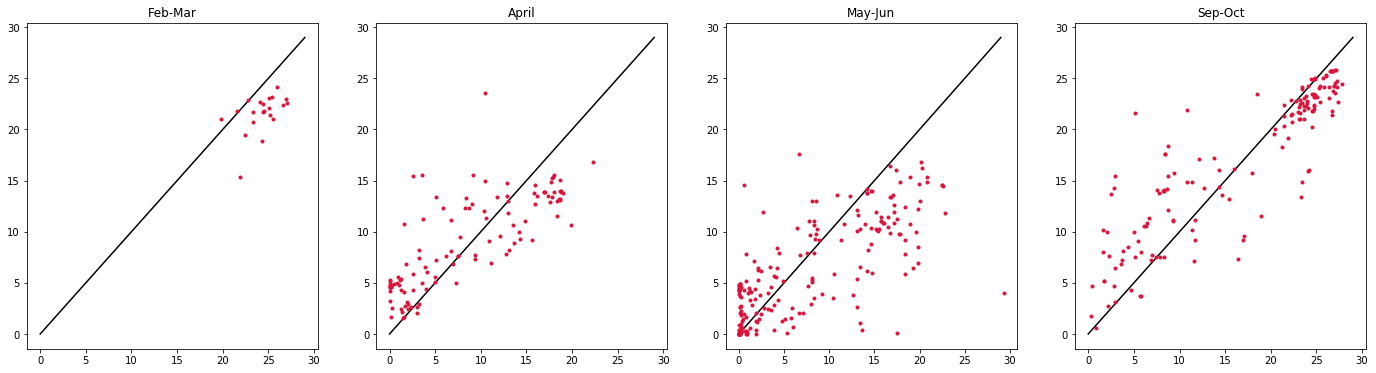

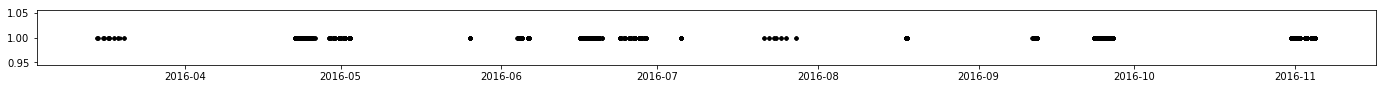

In [10]:
fig, ax = plt.subplots(1,4,figsize = (24,6))
yy=data.dtUTC[0].year
for axi in ax:
    axi.plot(np.arange(0,30),np.arange(0,30),'k-')
ps=et.varvarPlot(ax[0],data.loc[(data.Z<15)&(data.dtUTC<=dt.datetime(yy,4,1)),:],'N','mod_nitrate',cols=('crimson','darkturquoise','navy'))
ax[0].set_title('Feb-Mar')
ii1=(data.Z < 15)&(data.dtUTC<=dt.datetime(yy,5,1))&(data.dtUTC>dt.datetime(yy,4,1))
ps=et.varvarPlot(ax[1],data.loc[ii1,:],'N','mod_nitrate',cols=('crimson','darkturquoise','navy'))
ax[1].set_title('April')
ii2=(data.Z < 15)&(data.dtUTC<=dt.datetime(yy,9,1))&(data.dtUTC>dt.datetime(yy,5,1))
ps=et.varvarPlot(ax[2],data.loc[ii2,:],'N','mod_nitrate',cols=('crimson','darkturquoise','navy'))
ax[2].set_title('May-Jun')
ii3=(data.Z < 15)&(data.dtUTC<=dt.datetime(yy,12,1))&(data.dtUTC>dt.datetime(yy,9,1))
ps=et.varvarPlot(ax[3],data.loc[ii3,:],'N','mod_nitrate',cols=('crimson','darkturquoise','navy'))
ax[3].set_title('Sep-Oct')

#ii4=(data.Z < 15)&(data.dtUTC<=dt.datetime(2016,4,1))&(data.dtUTC>dt.datetime(2016,2,1))
#ps=et.varvarPlot(ax[0],data.loc[ii4,:],obsvar,modvar,cols=('darkturquoise','navy'))
#ii5=(data.Z < 15)&(data.dtUTC<=dt.datetime(2016,5,1))&(data.dtUTC>dt.datetime(2016,4,1))
#ps=et.varvarPlot(ax[1],data.loc[ii5,:],obsvar,modvar,cols=('darkturquoise','navy'))

print('Nitrate, z<15')
print('Feb-Mar:')
et.printstats(data.loc[(data.Z<15)&(data.dtUTC<=dt.datetime(yy,4,1)),:],'N','mod_nitrate')
print('April:')
et.printstats(data.loc[ii1,:],'N','mod_nitrate')
print('May-Jun:')
et.printstats(data.loc[ii2,:],'N','mod_nitrate')
print('Sep-Oct:')
et.printstats(data.loc[ii3,:],'N','mod_nitrate')
fig,ax=plt.subplots(1,1,figsize=(24,1))
plt.plot(data.dtUTC,np.ones(np.shape(data.dtUTC)),'k.')

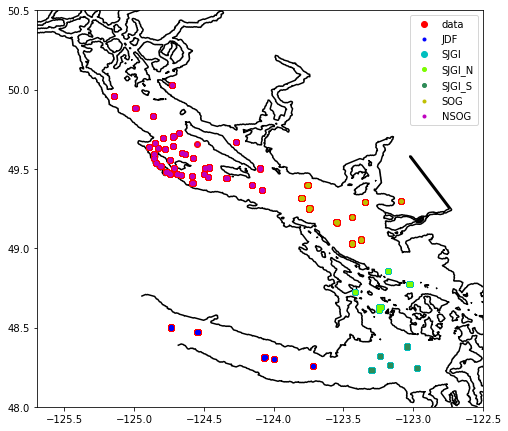

In [11]:
fig, ax = plt.subplots(figsize = (8,8))
viz_tools.set_aspect(ax, coords = 'map')
ax.plot(data['Lon'], data['Lat'], 'ro',label='data')
dJDF=data.loc[(data.Lon<-123.6)&(data.Lat<48.6)]
ax.plot(dJDF['Lon'],dJDF['Lat'],'b.',label='JDF')
dSJGI=data.loc[(data.Lon>=-123.6)&(data.Lat<48.9)]
ax.plot(dSJGI['Lon'],dSJGI['Lat'],'c.',label='SJGI',ms=12)
dSJGI_N=data.loc[(data.Lon>=-123.6)&(data.Lat<48.9)&(data.Lat>48.5)]
ax.plot(dSJGI_N['Lon'],dSJGI_N['Lat'],'.',color='lawngreen',label='SJGI_N',ms=8)
dSJGI_S=data.loc[(data.Lon>=-123.6)&(data.Lat<48.5)]
ax.plot(dSJGI_S['Lon'],dSJGI_S['Lat'],'.',color='seagreen',label='SJGI_S',ms=8)
dSOG=data.loc[(data.Lat>=48.9)&(data.Lon>-124.0)]
ax.plot(dSOG['Lon'],dSOG['Lat'],'y.',label='SOG')
dNSOG=data.loc[(data.Lat>=48.9)&(data.Lon<=-124.0)]
ax.plot(dNSOG['Lon'],dNSOG['Lat'],'m.',label='NSOG')
grid = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
viz_tools.plot_coastline(ax, grid, coords = 'map')
ax.set_ylim(48, 50.5)
ax.legend()
ax.set_xlim(-125.7, -122.5);

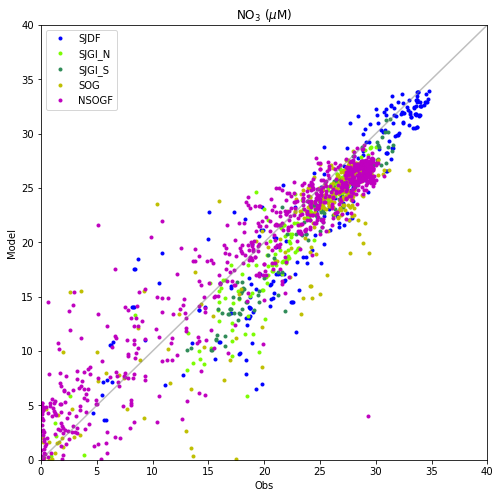

In [12]:
fig, ax = plt.subplots(figsize = (8,8))
ps1=et.varvarPlot(ax,dJDF,'N','mod_nitrate',cols=('b','darkturquoise','navy'),lname='SJDF')
ps2=et.varvarPlot(ax,dSJGI_N,'N','mod_nitrate',cols=('lawngreen','darkturquoise','navy'),lname='SJGI_N')
ps3=et.varvarPlot(ax,dSJGI_S,'N','mod_nitrate',cols=('seagreen','darkturquoise','navy'),lname='SJGI_S')
ps4=et.varvarPlot(ax,dSOG,'N','mod_nitrate',cols=('y','darkturquoise','navy'),lname='SOG')
ps5=et.varvarPlot(ax,dNSOG,'N','mod_nitrate',cols=('m','darkturquoise','navy'),lname='NSOGF')
ax.legend(handles=[ps1[0][0],ps2[0][0],ps3[0][0],ps4[0][0],ps5[0][0]])
ax.set_xlabel('Obs')
ax.set_ylabel('Model')
ax.set_title('NO$_3$ ($\mu$M)')
ax.set_xlim(0,40)
ax.set_ylim(0,40)
ax.plot((0,40),(0,40),'-',color='grey',alpha=.5)

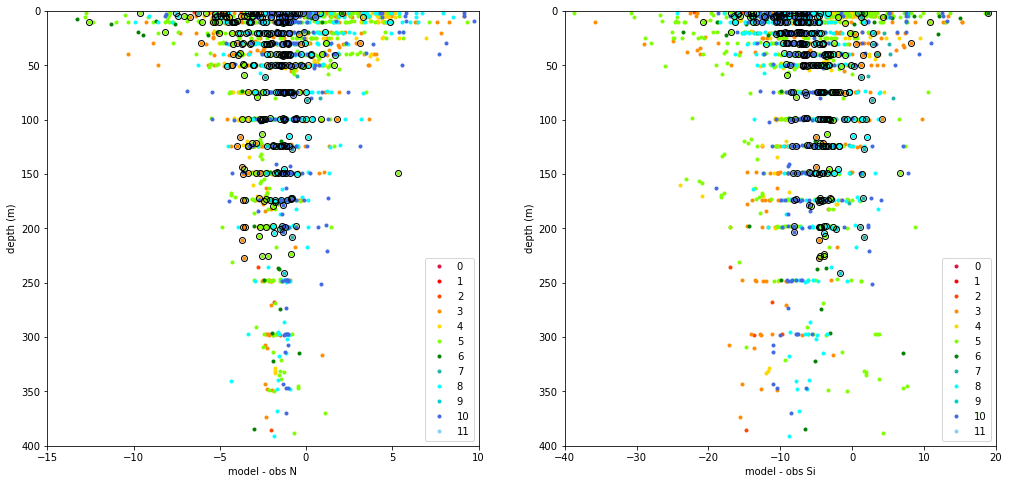

In [13]:
fig, ax = plt.subplots(1,2,figsize = (17,8))
cols=('crimson','red','orangered','darkorange','gold','chartreuse','green','lightseagreen','cyan','darkturquoise','royalblue',
      'lightskyblue','blue','darkblue','mediumslateblue','blueviolet','darkmagenta','fuchsia','deeppink','pink')
ii0=start_date
for ii in range(0,int((end_date-start_date).days/30)):
    iii=(data.dtUTC>=(start_date+dt.timedelta(days=ii*30)))&(data.dtUTC<(start_date+dt.timedelta(days=(ii+1)*30)))
    ax[0].plot(data.loc[iii,['mod_nitrate']].values-data.loc[iii,['N']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
    ax[1].plot(data.loc[iii,['mod_silicon']].values-data.loc[iii,['Si']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
for axi in (ax[0],ax[1]):
    axi.legend(loc=4)
    axi.set_ylim(400,0)
    axi.set_ylabel('depth (m)')
ax[0].set_xlabel('model - obs N')
ax[0].set_xlim(-15,10)
ax[1].set_xlabel('model - obs Si')
ax[1].set_xlim(-40,20)
ax[0].plot(dSJGI['mod_nitrate']-dSJGI['N'],dSJGI['Z'],'ko',markeredgecolor='k',markerfacecolor='None')
ax[1].plot(dSJGI['mod_silicon']-dSJGI['Si'],dSJGI['Z'],'ko',markeredgecolor='k',markerfacecolor='None')

# Silicate

In [14]:
print('Si')
print('z<15 m:')
et.printstats(data.loc[data.Z<15,:],'Si','mod_silicon')
print('15 m<=z<22 m:')
et.printstats(data.loc[(data.Z>=15)&(data.Z<22),:],'Si','mod_silicon')
print('z>=22 m:')
et.printstats(data.loc[data.Z>=22,:],'Si','mod_silicon')
print('all:')
et.printstats(data,'Si','mod_silicon')
print('obs Si < 50:')
et.printstats(data.loc[data.Si<50,:],'Si','mod_silicon')

Si
z<15 m:
  N: 495
  bias: -6.137759870219259
  RMSE: 10.63938911788308
  WSS: 0.8779639136580489
15 m<=z<22 m:
  N: 129
  bias: -7.320750995902138
  RMSE: 10.049336276844706
  WSS: 0.7114679305064093
z>=22 m:
  N: 1057
  bias: -6.250587195628299
  RMSE: 8.716030960388773
  WSS: 0.8020571118697055
all:
  N: 1681
  bias: -6.29948761452053
  RMSE: 9.426106962622335
  WSS: 0.9018518602414328
obs Si < 50:
  N: 1058
  bias: -4.761085933304141
  RMSE: 8.412419585666909
  WSS: 0.8994230198153887


(0, 80)

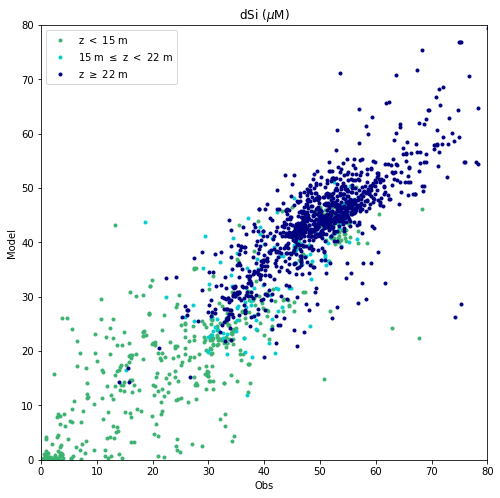

In [15]:
fig, ax = plt.subplots(figsize = (8,8))
ps=et.varvarPlot(ax,data,'Si','mod_silicon','Z',(15,22),'z','m',('mediumseagreen','darkturquoise','navy'))
ax.legend(handles=ps)
ax.set_xlabel('Obs')
ax.set_ylabel('Model')
ax.set_title('dSi ($\mu$M)')
ax.set_xlim(0,80)
ax.set_ylim(0,80)

Silicate, z<15
Feb-Mar:
  N: 21
  bias: -7.53168717883883
  RMSE: 8.851218477088107
  WSS: 0.341198325677865
April:
  N: 115
  bias: -3.8434730892285067
  RMSE: 9.668432605470317
  WSS: 0.7838370963991907
May-Jun:
  N: 206
  bias: -5.7842889233834125
  RMSE: 11.564708162657578
  WSS: 0.7171116870887045
Sep-Oct:
  N: 153
  bias: -8.14681556552064
  RMSE: 10.253679202771188
  WSS: 0.76543534083099


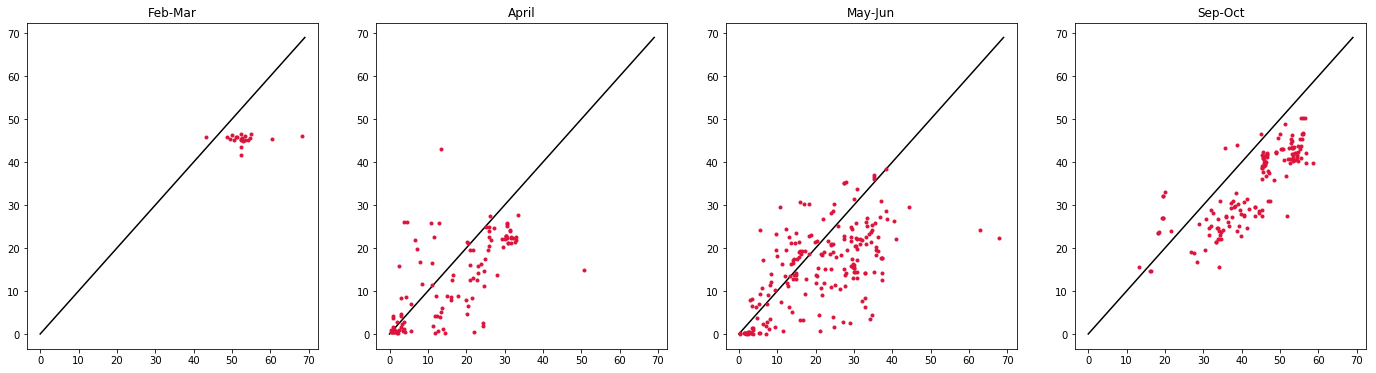

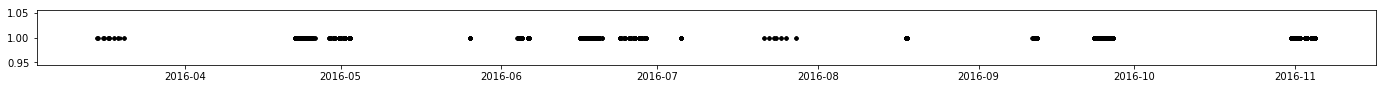

In [16]:
obsvar='Si'; modvar='mod_silicon'
fig, ax = plt.subplots(1,4,figsize = (24,6))
for axi in ax:
    axi.plot(np.arange(0,70),np.arange(0,70),'k-')
ps=et.varvarPlot(ax[0],data.loc[(data.Z<15)&(data.dtUTC<=dt.datetime(yy,4,1)),:],obsvar,modvar,cols=('crimson','darkturquoise','navy'))
ax[0].set_title('Feb-Mar')
ii1=(data.Z < 15)&(data.dtUTC<=dt.datetime(yy,5,1))&(data.dtUTC>dt.datetime(yy,4,1))
ps=et.varvarPlot(ax[1],data.loc[ii1,:],obsvar,modvar,cols=('crimson','darkturquoise','navy'))
ax[1].set_title('April')
ii2=(data.Z < 15)&(data.dtUTC<=dt.datetime(yy,9,1))&(data.dtUTC>dt.datetime(yy,5,1))
ps=et.varvarPlot(ax[2],data.loc[ii2,:],obsvar,modvar,cols=('crimson','darkturquoise','navy'))
ax[2].set_title('May-Jun')
ii3=(data.Z < 15)&(data.dtUTC<=dt.datetime(yy,12,1))&(data.dtUTC>dt.datetime(yy,9,1))
ps=et.varvarPlot(ax[3],data.loc[ii3,:],obsvar,modvar,cols=('crimson','darkturquoise','navy'))
ax[3].set_title('Sep-Oct')

print('Silicate, z<15')
print('Feb-Mar:')
et.printstats(data.loc[(data.Z<15)&(data.dtUTC<=dt.datetime(yy,4,1)),:],obsvar,modvar)
print('April:')
et.printstats(data.loc[ii1,:],obsvar,modvar)
print('May-Jun:')
et.printstats(data.loc[ii2,:],obsvar,modvar)
print('Sep-Oct:')
et.printstats(data.loc[ii3,:],obsvar,modvar)
fig,ax=plt.subplots(1,1,figsize=(24,1))
plt.plot(data.dtUTC,np.ones(np.shape(data.dtUTC)),'k.')

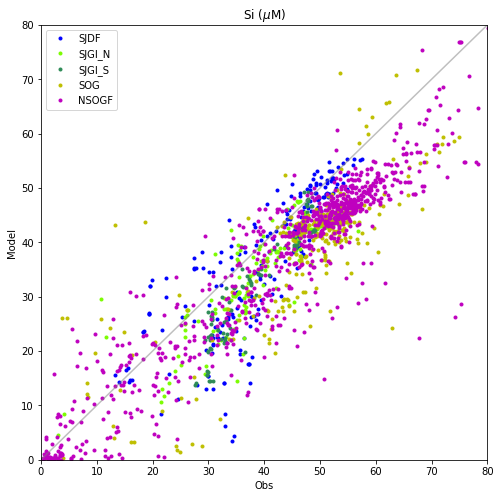

In [17]:
fig, ax = plt.subplots(figsize = (8,8))
ps1=et.varvarPlot(ax,dJDF,obsvar,modvar,cols=('b','darkturquoise','navy'),lname='SJDF')
ps2=et.varvarPlot(ax,dSJGI_N,obsvar,modvar,cols=('lawngreen','darkturquoise','navy'),lname='SJGI_N')
ps3=et.varvarPlot(ax,dSJGI_S,obsvar,modvar,cols=('seagreen','darkturquoise','navy'),lname='SJGI_S')
ps4=et.varvarPlot(ax,dSOG,obsvar,modvar,cols=('y','darkturquoise','navy'),lname='SOG')
ps5=et.varvarPlot(ax,dNSOG,obsvar,modvar,cols=('m','darkturquoise','navy'),lname='NSOGF')
ax.legend(handles=[ps1[0][0],ps2[0][0],ps3[0][0],ps4[0][0],ps5[0][0]])
ax.set_xlabel('Obs')
ax.set_ylabel('Model')
ax.set_title('Si ($\mu$M)')
ax.set_xlim(0,80)
ax.set_ylim(0,80)
ax.plot((0,80),(0,80),'-',color='grey',alpha=.5)

# Ratios

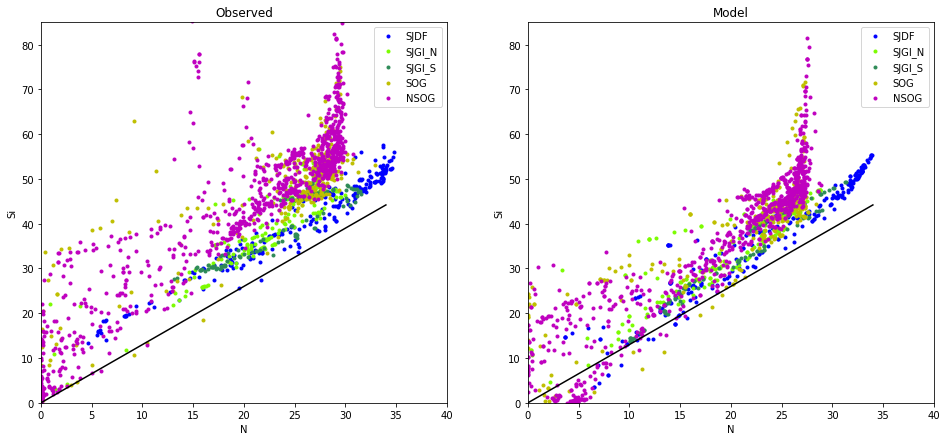

In [18]:
fig,ax=plt.subplots(1,2,figsize=(16,7))
p1=ax[0].plot(dJDF['N'],dJDF['Si'],'b.',label='SJDF')
p2=ax[0].plot(dSJGI_N['N'],dSJGI_N['Si'],'.',color='lawngreen',label='SJGI_N')
p2=ax[0].plot(dSJGI_S['N'],dSJGI_S['Si'],'.',color='seagreen',label='SJGI_S')
p3=ax[0].plot(dSOG['N'],dSOG['Si'],'y.',label='SOG')
p4=ax[0].plot(dNSOG['N'],dNSOG['Si'],'m.',label='NSOG')
ax[0].set_title('Observed')
ax[0].set_xlabel('N')
ax[0].set_ylabel('Si')
ax[0].set_xlim(0,40)
ax[0].set_ylim(0,85)
ax[0].legend()

p5=ax[1].plot(dJDF['mod_nitrate'],dJDF['mod_silicon'],'b.',label='SJDF')
p6=ax[1].plot(dSJGI_N['mod_nitrate'],dSJGI_N['mod_silicon'],'.',color='lawngreen',label='SJGI_N')
p6=ax[1].plot(dSJGI_S['mod_nitrate'],dSJGI_S['mod_silicon'],'.',color='seagreen',label='SJGI_S')
p7=ax[1].plot(dSOG['mod_nitrate'],dSOG['mod_silicon'],'y.',label='SOG')
p8=ax[1].plot(dNSOG['mod_nitrate'],dNSOG['mod_silicon'],'m.',label='NSOG')
ax[1].set_title('Model')
ax[1].set_xlabel('N')
ax[1].set_ylabel('Si')
ax[1].set_xlim(0,40)
ax[1].set_ylim(0,85)
ax[1].legend()
ax[0].plot(np.arange(0,35),1.3*np.arange(0,35),'k-')
ax[1].plot(np.arange(0,35),1.3*np.arange(0,35),'k-')

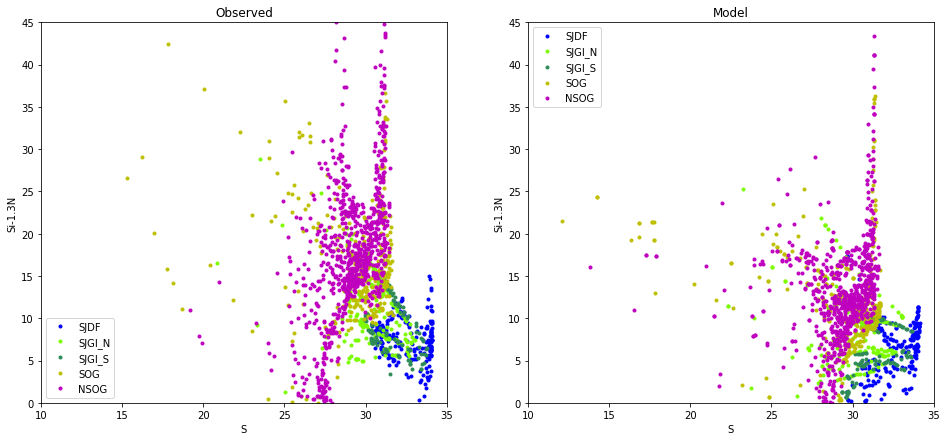

In [19]:
fig,ax=plt.subplots(1,2,figsize=(16,7))
p1=ax[0].plot(dJDF['AbsSal'], dJDF['Si']-1.3*dJDF['N'],'b.',label='SJDF')
p2=ax[0].plot(dSJGI_N['AbsSal'],dSJGI_N['Si']-1.3*dSJGI_N['N'],'.',color='lawngreen',label='SJGI_N')
p2=ax[0].plot(dSJGI_S['AbsSal'],dSJGI_S['Si']-1.3*dSJGI_S['N'],'.',color='seagreen',label='SJGI_S')
p3=ax[0].plot(dSOG['AbsSal'],dSOG['Si']-1.3*dSOG['N'],'y.',label='SOG')
p4=ax[0].plot(dNSOG['AbsSal'],dNSOG['Si']-1.3*dNSOG['N'],'m.',label='NSOG')
ax[0].set_title('Observed')
ax[0].set_xlabel('S')
ax[0].set_ylabel('Si-1.3N')
ax[0].set_xlim(10,35)
ax[0].set_ylim(0,45)
ax[0].legend()

p5=ax[1].plot(dJDF['mod_vosaline'],dJDF['mod_silicon']-1.3*dJDF['mod_nitrate'],'b.',label='SJDF')
p6=ax[1].plot(dSJGI_N['mod_vosaline'],dSJGI_N['mod_silicon']-1.3*dSJGI_N['mod_nitrate'],'.',color='lawngreen',label='SJGI_N')
p6=ax[1].plot(dSJGI_S['mod_vosaline'],dSJGI_S['mod_silicon']-1.3*dSJGI_S['mod_nitrate'],'.',color='seagreen',label='SJGI_S')
p7=ax[1].plot(dSOG['mod_vosaline'],dSOG['mod_silicon']-1.3*dSOG['mod_nitrate'],'y.',label='SOG')
p8=ax[1].plot(dNSOG['mod_vosaline'],dNSOG['mod_silicon']-1.3*dNSOG['mod_nitrate'],'m.',label='NSOG')
ax[1].set_title('Model')
ax[1].set_xlabel('S')
ax[1].set_ylabel('Si-1.3N')
ax[1].set_xlim(10,35)
ax[1].set_ylim(0,45)
ax[1].legend()

In [20]:
data.loc[data.Si>65,['Month','Lat','Lon','Z','Si']]

,Month,Lat,Lon,Z,Si
3,3.0,49.250500,-123.749000,385.23,71.41
10,3.0,49.055500,-123.372000,1.38812,68.21
23,3.0,49.505833,-124.099500,413.72,70.46
27,3.0,49.466833,-124.499333,297.425,66.30
36,3.0,49.670333,-124.272667,297.717,78.25
178,4.0,49.030667,-123.436833,248.62,67.93
179,4.0,49.030667,-123.436833,297.536,70.96
180,4.0,49.030667,-123.436833,310.406,71.82
193,4.0,49.163333,-123.549833,198.502,65.70
194,4.0,49.163333,-123.549833,247.726,65.69


# Chlorophyll

In [21]:
data['l10_obsChl']=np.log10(data['Chlorophyll_Extracted']+0.01)
data['l10_modChl']=np.log10(2*(data['mod_diatoms']+data['mod_ciliates']+data['mod_flagellates'])+0.01)
data['mod_Chl']=2*(data['mod_diatoms']+data['mod_ciliates']+data['mod_flagellates'])

In [22]:
print('log10[Chl+0.01]')
print('z<15 m:')
et.printstats(data.loc[data.Z<15,:],'l10_obsChl','l10_modChl')
print('z>=15 m:')
et.printstats(data.loc[data.Z>=15,:],'l10_obsChl','l10_modChl')
print('all:')
et.printstats(data,'l10_obsChl','l10_modChl')
print('\n')
print('Chl')
print('z<15 m:')
et.printstats(data.loc[data.Z<15,:],'Chlorophyll_Extracted','mod_Chl')
print('z>=15 m:')
et.printstats(data.loc[data.Z>=15,:],'Chlorophyll_Extracted','mod_Chl')
print('all:')
et.printstats(data,'Chlorophyll_Extracted','mod_Chl')


log10[Chl+0.01]
z<15 m:
  N: 263
  bias: -0.08848269254385785
  RMSE: 0.409201581467102
  WSS: 0.7420340973648489
z>=15 m:
  N: 128
  bias: -0.0904817803079834
  RMSE: 0.35617483503590713
  WSS: 0.7179593220769542
all:
  N: 391
  bias: -0.08913712536689636
  RMSE: 0.3926317082122253
  WSS: 0.7843652683650995


Chl
z<15 m:
  N: 263
  bias: -0.3536599047793869
  RMSE: 2.9333320097281352
  WSS: 0.6022991237453141
z>=15 m:
  N: 128
  bias: -0.3902483508472505
  RMSE: 1.1060340219730995
  WSS: 0.6563561884369168
all:
  N: 391
  bias: -0.36563770809572116
  RMSE: 2.4875910386498643
  WSS: 0.6580083078938634


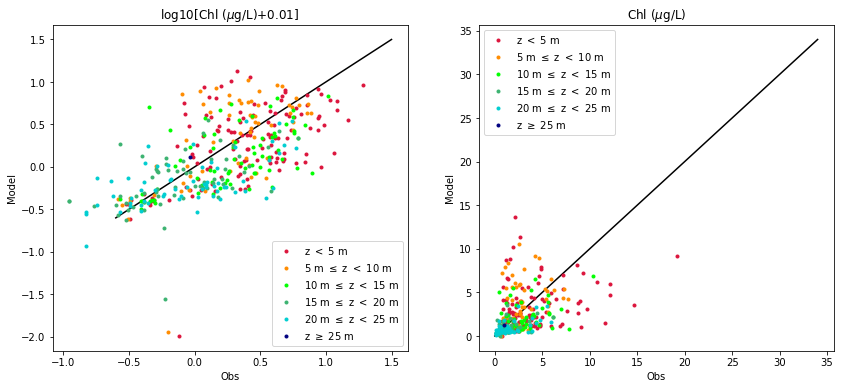

In [23]:
fig, ax = plt.subplots(1,2,figsize = (14,6))
ax[0].plot(np.arange(-.6,1.6,.1),np.arange(-.6,1.6,.1),'k-')
ps=et.varvarPlot(ax[0],data,'l10_obsChl','l10_modChl','Z',(5,10,15,20,25),'z','m',('crimson','darkorange','lime','mediumseagreen','darkturquoise','navy'))
ax[0].legend(handles=ps)
ax[0].set_xlabel('Obs')
ax[0].set_ylabel('Model')
ax[0].set_title('log10[Chl ($\mu$g/L)+0.01]')
ax[1].plot(np.arange(0,35),np.arange(0,35),'k-')
ps=et.varvarPlot(ax[1],data,'Chlorophyll_Extracted','mod_Chl','Z',(5,10,15,20,25),'z','m',('crimson','darkorange','lime','mediumseagreen','darkturquoise','navy'))
ax[1].legend(handles=ps)
ax[1].set_xlabel('Obs')
ax[1].set_ylabel('Model')
ax[1].set_title('Chl ($\mu$g/L)')

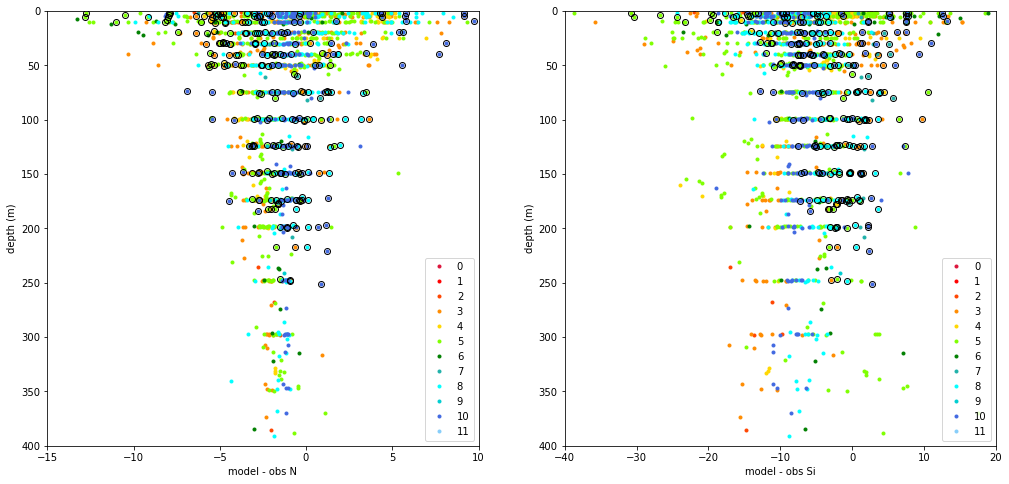

In [28]:
fig, ax = plt.subplots(1,2,figsize = (17,8))
cols=('crimson','red','orangered','darkorange','gold','chartreuse','green','lightseagreen','cyan','darkturquoise','royalblue',
      'lightskyblue','blue','darkblue','mediumslateblue','blueviolet','darkmagenta','fuchsia','deeppink','pink')
ii0=start_date
for ii in range(0,int((end_date-start_date).days/30)):
    iii=(data.dtUTC>=(start_date+dt.timedelta(days=ii*30)))&(data.dtUTC<(start_date+dt.timedelta(days=(ii+1)*30)))
    ax[0].plot(data.loc[iii,['mod_nitrate']].values-data.loc[iii,['N']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
    ax[1].plot(data.loc[iii,['mod_silicon']].values-data.loc[iii,['Si']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
for axi in (ax[0],ax[1]):
    axi.legend(loc=4)
    axi.set_ylim(400,0)
    axi.set_ylabel('depth (m)')
ax[0].set_xlabel('model - obs N')
ax[0].set_xlim(-15,10)
ax[1].set_xlabel('model - obs Si')
ax[1].set_xlim(-40,20)
ax[0].plot(dJDF['mod_nitrate']-dJDF['N'],dJDF['Z'],'ko',markeredgecolor='k',markerfacecolor='None')
ax[1].plot(dJDF['mod_silicon']-dJDF['Si'],dJDF['Z'],'ko',markeredgecolor='k',markerfacecolor='None')

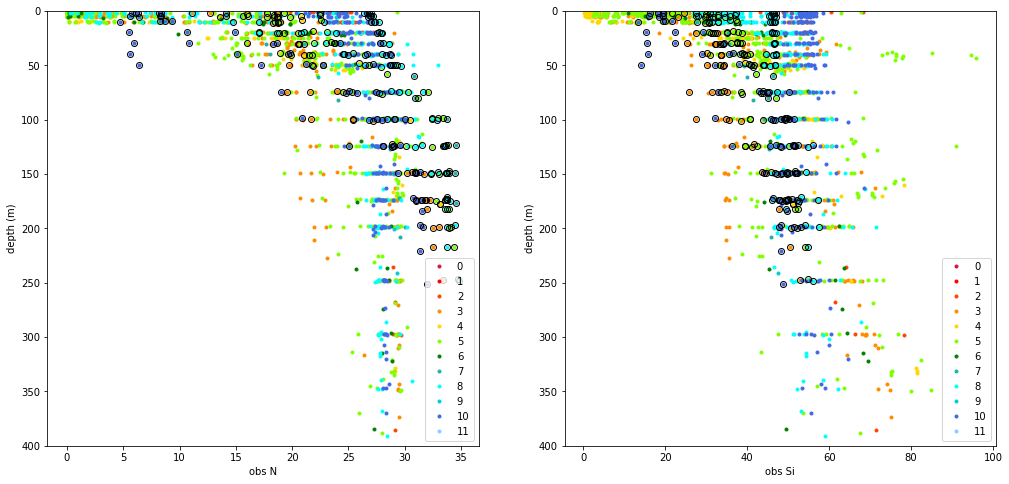

In [29]:
fig, ax = plt.subplots(1,2,figsize = (17,8))
cols=('crimson','red','orangered','darkorange','gold','chartreuse','green','lightseagreen','cyan','darkturquoise','royalblue',
      'lightskyblue','blue','darkblue','mediumslateblue','blueviolet','darkmagenta','fuchsia','deeppink','pink')
ii0=start_date
for ii in range(0,int((end_date-start_date).days/30)):
    iii=(data.dtUTC>=(start_date+dt.timedelta(days=ii*30)))&(data.dtUTC<(start_date+dt.timedelta(days=(ii+1)*30)))
    ax[0].plot(data.loc[iii,['N']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
    ax[1].plot(data.loc[iii,['Si']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
for axi in (ax[0],ax[1]):
    axi.legend(loc=4)
    axi.set_ylim(400,0)
    axi.set_ylabel('depth (m)')
ax[0].set_xlabel('obs N')
#ax[0].set_xlim(-15,10)
ax[1].set_xlabel('obs Si')
#ax[1].set_xlim(-40,20)
ax[0].plot(dJDF['N'],dJDF['Z'],'ko',markeredgecolor='k',markerfacecolor='None')
ax[1].plot(dJDF['Si'],dJDF['Z'],'ko',markeredgecolor='k',markerfacecolor='None')

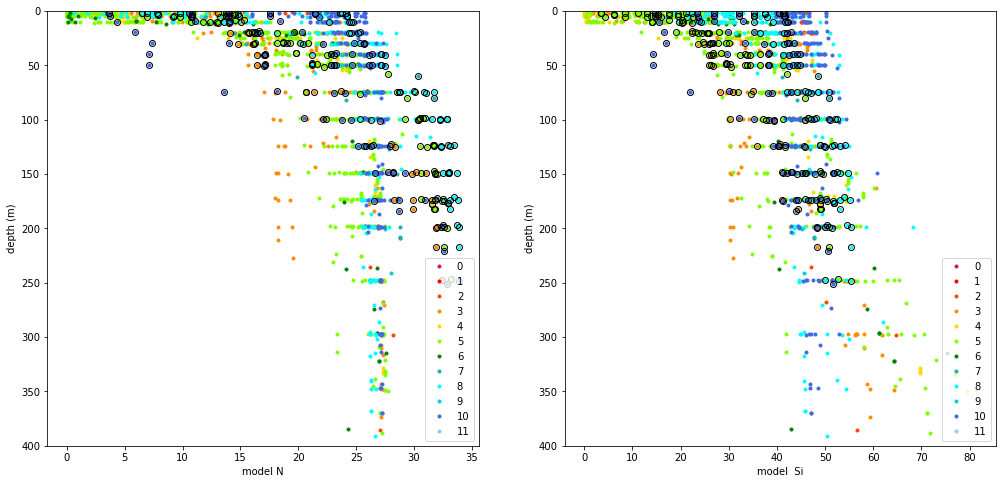

In [30]:
fig, ax = plt.subplots(1,2,figsize = (17,8))
cols=('crimson','red','orangered','darkorange','gold','chartreuse','green','lightseagreen','cyan','darkturquoise','royalblue',
      'lightskyblue','blue','darkblue','mediumslateblue','blueviolet','darkmagenta','fuchsia','deeppink','pink')
ii0=start_date
for ii in range(0,int((end_date-start_date).days/30)):
    iii=(data.dtUTC>=(start_date+dt.timedelta(days=ii*30)))&(data.dtUTC<(start_date+dt.timedelta(days=(ii+1)*30)))
    ax[0].plot(data.loc[iii,['mod_nitrate']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
    ax[1].plot(data.loc[iii,['mod_silicon']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
for axi in (ax[0],ax[1]):
    axi.legend(loc=4)
    axi.set_ylim(400,0)
    axi.set_ylabel('depth (m)')
ax[0].set_xlabel('model N')
ax[1].set_xlabel('model  Si')
ax[0].plot(dJDF['mod_nitrate'],dJDF['Z'],'ko',markeredgecolor='k',markerfacecolor='None')
ax[1].plot(dJDF['mod_silicon'],dJDF['Z'],'ko',markeredgecolor='k',markerfacecolor='None')

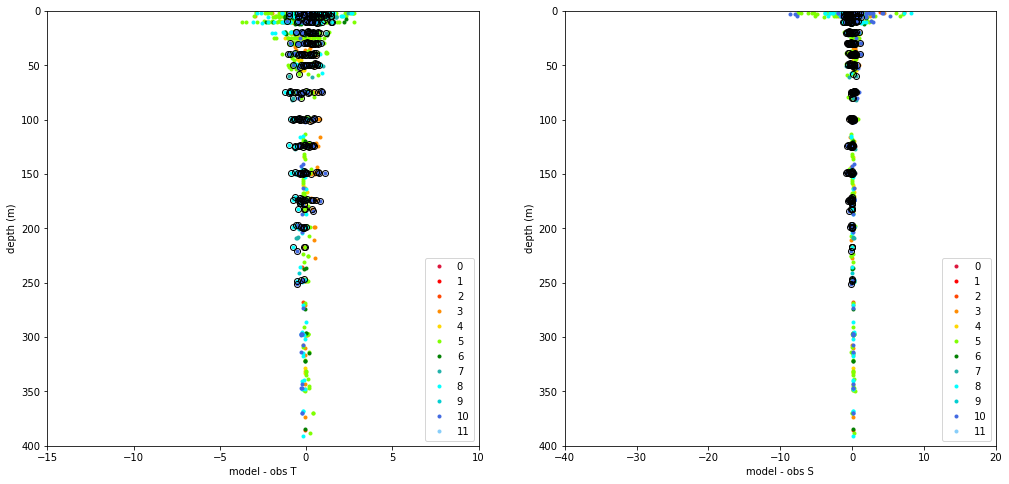

In [31]:
fig, ax = plt.subplots(1,2,figsize = (17,8))
cols=('crimson','red','orangered','darkorange','gold','chartreuse','green','lightseagreen','cyan','darkturquoise','royalblue',
      'lightskyblue','blue','darkblue','mediumslateblue','blueviolet','darkmagenta','fuchsia','deeppink','pink')
ii0=start_date
for ii in range(0,int((end_date-start_date).days/30)):
    iii=(data.dtUTC>=(start_date+dt.timedelta(days=ii*30)))&(data.dtUTC<(start_date+dt.timedelta(days=(ii+1)*30)))
    ax[0].plot(data.loc[iii,['mod_votemper']].values-data.loc[iii,['ConsT']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
    ax[1].plot(data.loc[iii,['mod_vosaline']].values-data.loc[iii,['AbsSal']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
for axi in (ax[0],ax[1]):
    axi.legend(loc=4)
    axi.set_ylim(400,0)
    axi.set_ylabel('depth (m)')
ax[0].set_xlabel('model - obs T')
ax[0].set_xlim(-15,10)
ax[1].set_xlabel('model - obs S')
ax[1].set_xlim(-40,20)
ax[0].plot(dJDF['mod_votemper']-dJDF['ConsT'],dJDF['Z'],'ko',markeredgecolor='k',markerfacecolor='None')
ax[1].plot(dJDF['mod_vosaline']-dJDF['AbsSal'],dJDF['Z'],'ko',markeredgecolor='k',markerfacecolor='None')

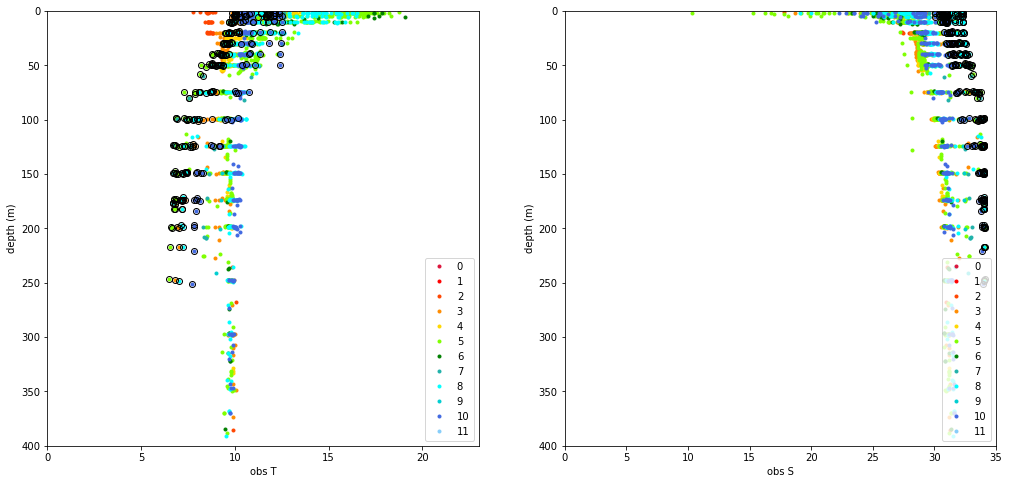

In [32]:
fig, ax = plt.subplots(1,2,figsize = (17,8))
cols=('crimson','red','orangered','darkorange','gold','chartreuse','green','lightseagreen','cyan','darkturquoise','royalblue',
      'lightskyblue','blue','darkblue','mediumslateblue','blueviolet','darkmagenta','fuchsia','deeppink','pink')
ii0=start_date
for ii in range(0,int((end_date-start_date).days/30)):
    iii=(data.dtUTC>=(start_date+dt.timedelta(days=ii*30)))&(data.dtUTC<(start_date+dt.timedelta(days=(ii+1)*30)))
    ax[0].plot(data.loc[iii,['ConsT']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
    ax[1].plot(data.loc[iii,['AbsSal']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
for axi in (ax[0],ax[1]):
    axi.legend(loc=4)
    axi.set_ylim(400,0)
    axi.set_ylabel('depth (m)')
ax[0].set_xlabel('obs T')
ax[0].set_xlim(0,23)
ax[1].set_xlabel('obs S')
ax[1].set_xlim(0,35)
ax[0].plot(dJDF['ConsT'],dJDF['Z'],'ko',markeredgecolor='k',markerfacecolor='None')
ax[1].plot(dJDF['AbsSal'],dJDF['Z'],'ko',markeredgecolor='k',markerfacecolor='None')

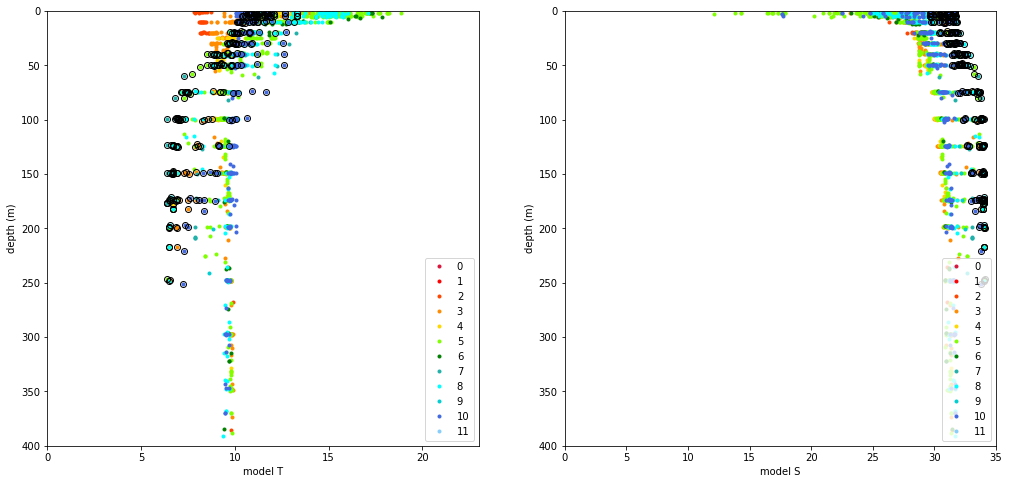

In [33]:
fig, ax = plt.subplots(1,2,figsize = (17,8))
cols=('crimson','red','orangered','darkorange','gold','chartreuse','green','lightseagreen','cyan','darkturquoise','royalblue',
      'lightskyblue','blue','darkblue','mediumslateblue','blueviolet','darkmagenta','fuchsia','deeppink','pink')
ii0=start_date
for ii in range(0,int((end_date-start_date).days/30)):
    iii=(data.dtUTC>=(start_date+dt.timedelta(days=ii*30)))&(data.dtUTC<(start_date+dt.timedelta(days=(ii+1)*30)))
    ax[0].plot(data.loc[iii,['mod_votemper']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
    ax[1].plot(data.loc[iii,['mod_vosaline']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
for axi in (ax[0],ax[1]):
    axi.legend(loc=4)
    axi.set_ylim(400,0)
    axi.set_ylabel('depth (m)')
ax[0].set_xlabel('model T')
ax[0].set_xlim(0,23)
ax[1].set_xlabel('model S')
ax[1].set_xlim(0,35)
ax[0].plot(dJDF['mod_votemper'],dJDF['Z'],'ko',markeredgecolor='k',markerfacecolor='None')
ax[1].plot(dJDF['mod_vosaline'],dJDF['Z'],'ko',markeredgecolor='k',markerfacecolor='None')